In [1]:
# In the previous tutorials, we learnt how to load the data, process them, and obtain a functioning surrogate model
# that represent, in a much more compact way, our full state CFD simulation. Here, we finally test this model by applying
# a different set of inputs to the surrogate model and comparing the results with the CFD results.

In [2]:
# As we have now learnt how to create the ROM, we will directly use the driver, which automatically load all the data,
# create the physical model, and create the ROM. This is the usual way the user is expected to use the code. However,
# it is important to understand what is happening, thus the requirement for the first three tutorials.

# The driver has two ways of operating:
    # 1) It can be given a set of structural inputs and can apply them to the aerodynamic model
    # 2) It can solve for the structural equations of motions and couple them with the DMD model, in this case it requires
    #    an additional file describing the structural model
    
# In our case, we will provide the structural inputs, so the driver will work following the first path    

# The ROM will be created with an artificial stabilisation, the brunton one.

Creating the physical model.
Importing the data from the files.
Obtaining the normals to the different panels.
Completed reading
Obtaining the mode shapes
Starting with the undeformed condition
Obtain now the deformation due to modes
Opened file 1 of 2
Opened file 2 of 2
Completed reading
Done


Creating the database for the reduced order model.
Importing the data from the files.
Opened structural history file data/blendedStep/StructHistoryModal.dat.
Completed reading
Starting the reading of surface_flow.csv files.
Opened time iter 1099 last time iter is 1099
Completed reading
Done


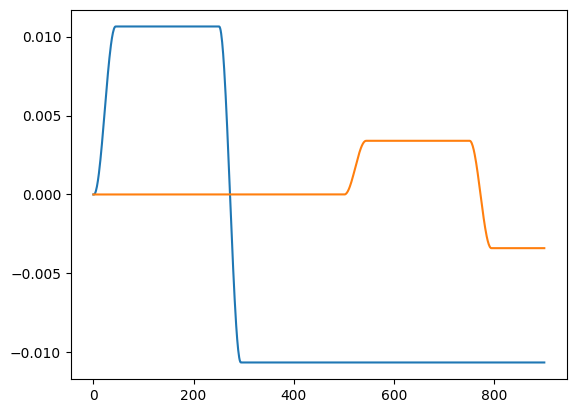

Please select steady state for mode 0:
450
Please select steady state for mode 1:
850
Opened structural inputs file data/inputsTutorial4.dat.
Completed reading
Time iteration 3762 of 3762
Completed time integration
The output is stored in file data/outputsTutorial4.dat


In [3]:
# The driver is a fully automatic function that runs using an external configuration file. It is a one-liner
import os
os.chdir("..")
import driver
os.chdir("Tutorials")

driver.main("data/configTutorial4.cfg")

In [4]:
# The driver deletes all the data in memory after computation, to free up space. Thus, the output is stored in a file.
# We can now load the file and plot the data
lift = []
with open("data/outputsTutorial4.dat") as file:
    line = file.readline()
    line = file.readline()
    while True:
        if not line:
            break
        line.strip("\r\n")
        lift.append(float(line))
        line = file.readline()

In [5]:
# We load from file also the reference lift, computed via the full simulation
lift_ref = []
with open("data/liftRefTutorial4.csv") as file:
    line = file.readline()
    line = file.readline()
    while True:
        if not line:
            break
        line.strip("\r\n")
        lift_ref.append(float(line))
        line = file.readline()

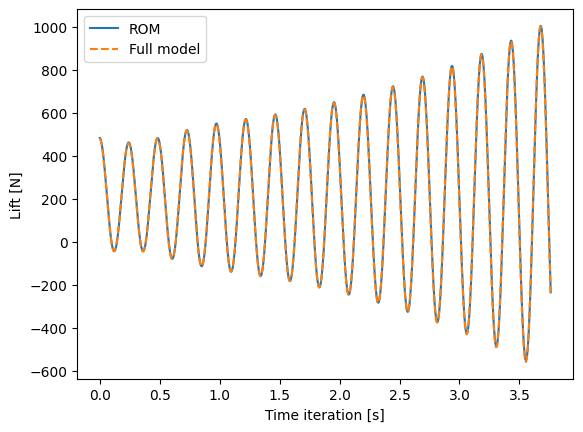

In [6]:
# We can finally compare the ROM with the full model. Please note that this is a true testing of the method,
# as the DMDc was trained with a completely different signal
from matplotlib import pyplot as plt
import numpy as np

plt.plot(0.001*np.linspace(0,len(lift)-1,len(lift)),lift, '-')
plt.plot(0.005*np.linspace(0,len(lift_ref)-1,len(lift_ref)),lift_ref, '--')
# just make the plot pretty
plt.xlabel("Time iteration [s]")
plt.ylabel("Lift [N]")
plt.legend(["ROM","Full model"])

np.savetxt('liftTutorial4.csv', lift, delimiter=',')
np.savetxt('lift_refTutorial4.csv', lift_ref, delimiter=',')